In [1]:
import pymc4 as pm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = tf.ConfigProto()
config.graph_options.optimizer_options.global_jit_level = (
    tf.OptimizerOptions.ON_1)
config.intra_op_parallelism_threads = 1
config.inter_op_parallelism_threads = 1
sess = tf.InteractiveSession(config=config)

In [3]:
# Logp calculation for linear regression 
@pm.model
def linreg(sd_prior='half_normal', n_points = 100):    
    # Define priors
    sigma = pm.HalfNormal('sigma', scale = 10)
    intercept = pm.Normal('Intercept', 0, scale=10)
    x_coeff = pm.Normal('weight', 0, scale = 5)
    x = np.linspace(-5, 5, n_points)
    
    # Define likelihood
    y = pm.Normal('y', loc=intercept + x_coeff * x, scale=sigma)
    
    
model = linreg.configure()

forward_sample = sess.run(model.forward_sample())

forward_sample

{'sigma': 14.084137,
 'Intercept': -15.912866,
 'weight': -3.5392892,
 'y': array([ 13.990862  ,  16.006577  ,   2.033938  ,   0.5904664 ,
          9.957224  ,   9.361367  ,  12.154184  ,  24.72681   ,
         -5.8464837 ,  21.918232  , -24.289982  ,  16.87201   ,
        -35.4403    , -10.133292  ,   3.7038345 ,  -9.285144  ,
        -30.131893  ,   9.849411  , -10.70291   , -27.810795  ,
          7.8718843 , -18.42009   ,  -0.90458727, -17.58231   ,
         22.003012  ,  -6.592058  ,   5.769926  , -16.540697  ,
        -22.478647  ,   5.469839  , -24.127476  , -28.478394  ,
        -30.298954  ,  12.817571  ,  -2.8891902 , -22.484737  ,
          8.570807  ,  18.812664  , -24.974136  ,  -0.8079338 ,
         20.022888  , -11.108465  ,   1.421485  , -12.649093  ,
        -16.071373  , -25.265276  , -18.485718  , -14.892247  ,
        -18.14464   , -10.422589  ,  -6.1294146 , -26.90367   ,
        -24.541529  ,   3.8628998 , -31.02291   ,   0.57263756,
         -9.977322  , -13.046

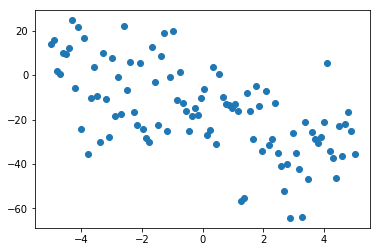

In [4]:
plt.scatter(np.linspace(-5, 5, 100), forward_sample['y'])

In [5]:
func = model.make_log_prob_function()
sigma = tf.placeholder(tf.float32)
intercept = tf.placeholder(tf.float32)
x_coeff = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32, shape=(100,))
logp = func(sigma, intercept, x_coeff, y)


In [6]:
feed_dict = {sigma: forward_sample['sigma'], 
            intercept: forward_sample['Intercept'], 
            x_coeff: forward_sample['weight'], 
            y: forward_sample['y']}

sess.run(logp, feed_dict=feed_dict)

-428.53656

In [8]:
import pymc3 as pm3

In [ ]:
n_points = 100
with pm3.Model() as model3: 
    # Define priors
    sigma = pm3.HalfNormal('sigma', sd = 10, observed=forward_sample['sigma'])
    intercept = pm3.Normal('Intercept', 0, 10, observed=forward_sample['Intercept'])
    x_coeff = pm3.Normal('weight', 0, 5, observed=forward_sample['weight'])
    x = np.linspace(-5, 5, n_points)
    
    # Define likelihood
    y = pm3.Normal('y', intercept + x_coeff * x, sigma, observed=forward_sample['y'])
    
model3.logp()

/anaconda3/envs/GSoC/lib/python3.6/site-packages/theano/gof/cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
/anaconda3/envs/GSoC/lib/python3.6/site-packages/theano/gof/cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
/anaconda3/envs/GSoC/lib/python3.6/site-packages/theano/gof/cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
/anaconda3/envs/GSoC/lib/python3.6/site-packages/theano/gof/cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
/anaconda3/envs/GSoC/lib/python3.6/site-packages/theano/gof/cmodule.py:274: DeprecationWarning: SO is deprecated, use EXT_SUFFIX
  dist_suffix = distutils.sysconfig.get_config_var("SO")
/anaconda3/envs/GSoC/lib/python3.6/site-packages/theano/gof/cmodule.py

In [ ]:
forward_sample['y']